In [1]:
#Import and load the datasets
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [2]:
#Data Preprocessing
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (for use with categorical_crossentropy)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
#Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Dense layers
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 corresponds to the number of classes
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [4]:
#Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
#Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2023-11-15 12:32:04.910544: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 13s 8ms/step - loss: 1.4401 - accuracy: 0.4830 - val_loss: 1.1680 - val_accuracy: 0.5887
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0970 - accuracy: 0.6163 - val_loss: 1.1223 - val_accuracy: 0.6007
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9622 - accuracy: 0.6666 - val_loss: 0.9598 - val_accuracy: 0.6696
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8695 - accuracy: 0.6973 - val_loss: 0.9201 - val_accuracy: 0.6836
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7987 - accuracy: 0.7232 - val_loss: 0.9259 - val_accuracy: 0.6811
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7367 - accuracy: 0.7450 - val_loss: 0.9184 - val_accuracy: 0.6858
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6820 - accuracy: 0.7646 - val_loss: 0.9389 - val_accuracy: 0.6

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.9527 - accuracy: 0.7000 - 782ms/epoch - 2ms/step

Test accuracy: 0.699999988079071


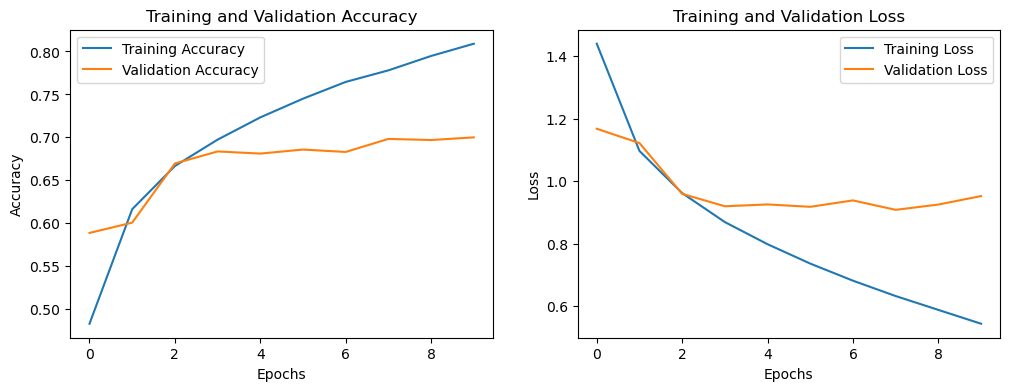

In [7]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [8]:
#Overfitting exists here; the model is highly accurate with training data but not as accurate during validation. Let us use some strategies to mitigate overfitting.
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fits the model on batches with real-time data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32, epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10


2023-11-15 17:10:37.434557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1562/1562 [==============================] - 13s 8ms/step - loss: 1.2953 - accuracy: 0.5476 - val_loss: 1.0499 - val_accuracy: 0.6326
Epoch 2/10
1562/1562 [==============================] - 12s 8ms/step - loss: 1.2102 - accuracy: 0.5780 - val_loss: 0.9347 - val_accuracy: 0.6772
Epoch 3/10
1562/1562 [==============================] - 12s 8ms/step - loss: 1.1681 - accuracy: 0.5900 - val_loss: 0.9493 - val_accuracy: 0.6767
Epoch 4/10
1562/1562 [==============================] - 12s 8ms/step - loss: 1.1483 - accuracy: 0.5961 - val_loss: 1.0668 - val_accuracy: 0.6387
Epoch 5/10
1562/1562 [==============================] - 12s 8ms/step - loss: 1.1228 - accuracy: 0.6066 - val_loss: 0.8866 - val_accuracy: 0.6909
Epoch 6/10
1562/1562 [==============================] - 12s 8ms/step - loss: 1.0976 - accuracy: 0.6136 - val_loss: 0.8860 - val_accuracy: 0.6928
Epoch 7/10
1562/1562 [==============================] - 13s 8ms/step - loss: 1.0842 - accuracy: 0.6172 - val_loss: 0.9947 - val_accuracy: 0.6

In [9]:
#Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6572 - accuracy: 0.7695 - val_loss: 0.7194 - val_accuracy: 0.7520
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5621 - accuracy: 0.8048 - val_loss: 0.7302 - val_accuracy: 0.7526
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4995 - accuracy: 0.8244 - val_loss: 0.7582 - val_accuracy: 0.7471
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4453 - accuracy: 0.8423 - val_loss: 0.8124 - val_accuracy: 0.7382
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3990 - accuracy: 0.8594 - val_loss: 0.8456 - val_accuracy: 0.7411
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3618 - accuracy: 0.8718 - val_loss: 0.9035 - val_accuracy: 0.7338
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3229 - accuracy: 0.8862 - val_loss: 0.9200 - val_ac

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100}%")

313/313 - 1s - loss: 1.1033 - accuracy: 0.7309 - 889ms/epoch - 3ms/step
Test Accuracy: 73.089998960495%
